In [1]:
# Import all libraries
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Load dataset
data = pd.read_csv(r"C:\Workspace\Projects\Resume Summarizer\ResumeRanker_Shared\env\ResumeRanker_Shared\assets\data\UpdatedResumeDataSet.csv", engine='python')
# data = pd.read_csv('/content/drive/My Drive/CodeDay/UpdatedResumeDataSet.csv') # Comment this line and uncomment the above line if this does not work for you
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
# Print unique categories of resumes
print(data['Category'].value_counts())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


In [4]:
# Drop rows where category is "Testing" and store new size of dataset
data = data[data.Category != 'Testing']
data_size = len(data)

<Axes: xlabel='count', ylabel='Category'>

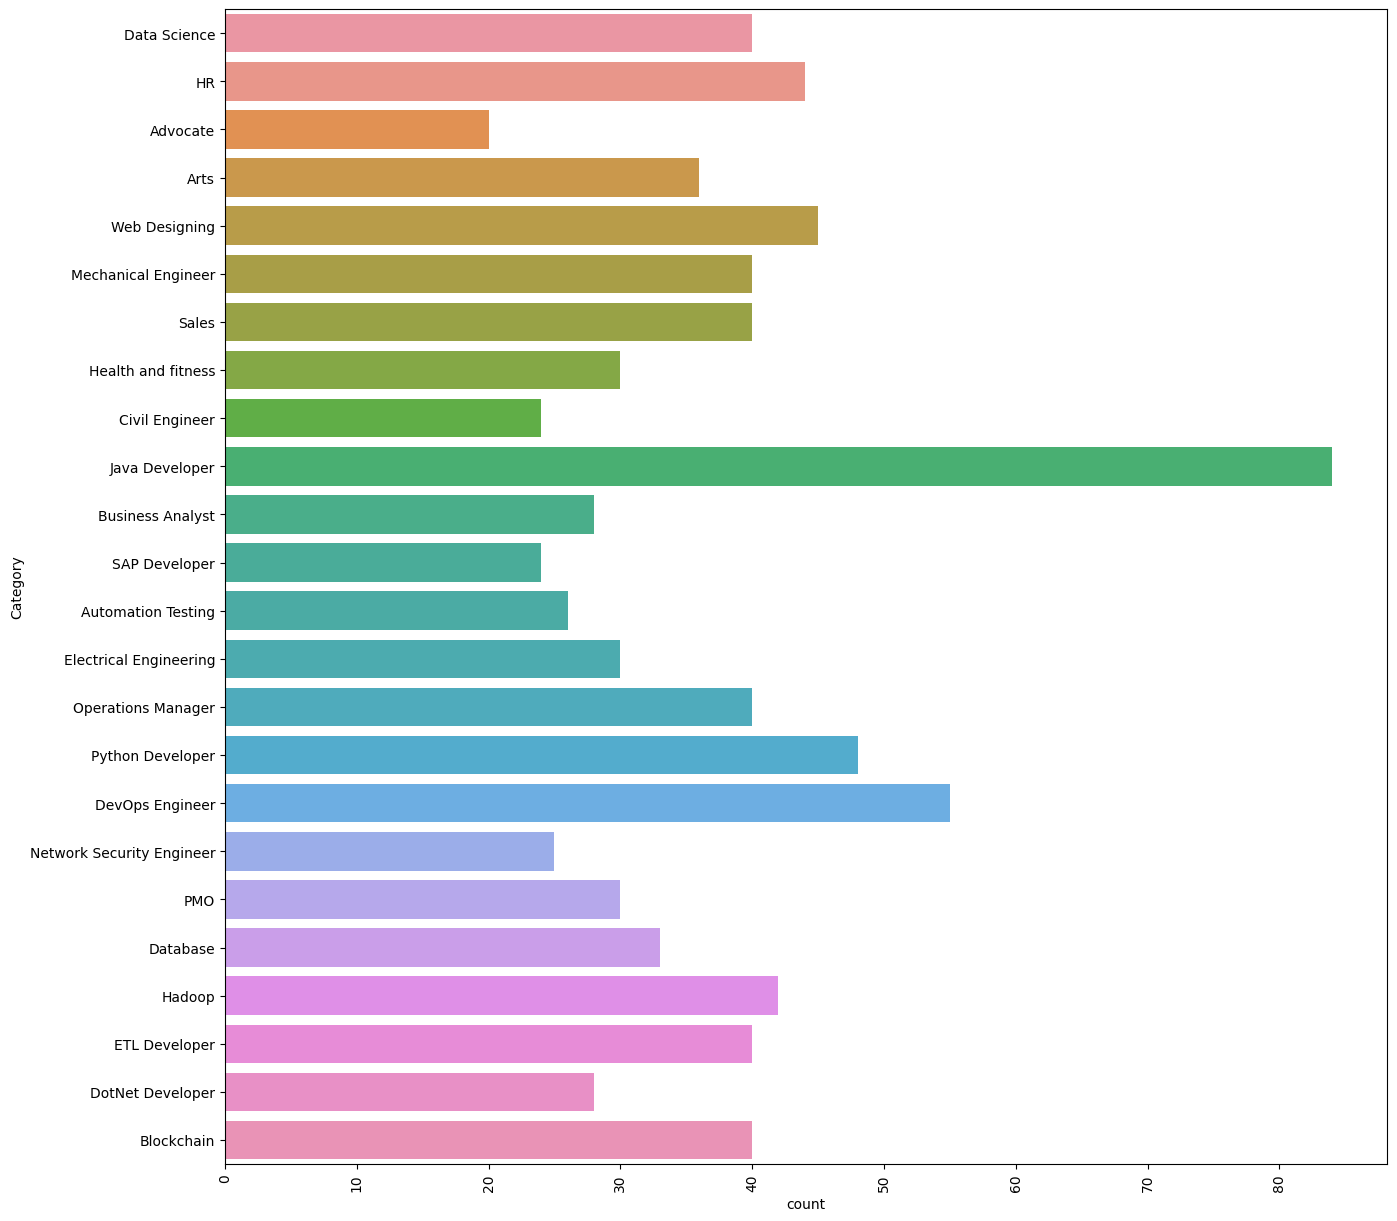

In [5]:
# Bar graph visualization
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

In [6]:
# Get set of stopwords
stopwords_set = set(stopwords.words('english')+['``',"''"])

In [7]:
# Function to clean resume text
def clean_text(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    resume_text = resume_text.lower()  # convert to lowercase
    resume_text_tokens = word_tokenize(resume_text)  # tokenize
    filtered_text = [w for w in resume_text_tokens if not w in stopwords_set]  # remove stopwords
    return ' '.join(filtered_text)

In [8]:
# Print a sample original resume
print('--- Original resume ---')
print(data['Resume'][0])

--- Original resume ---
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and 

In [9]:
# Print the same resume after text cleaning
data['cleaned_resume'] = data.Resume.apply(lambda x: clean_text(x))

print('--- Cleaned resume ---')
print(data['cleaned_resume'][0])

--- Cleaned resume ---
skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists elerating r

In [10]:
data

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 b e uit rg...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
887,Blockchain,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...,hobbies playing chess solving rubik cube watch...
888,Blockchain,Skills Strong CS fundamentals and problem solv...,skills strong cs fundamentals problem solving ...
889,Blockchain,"KEY SKILLS: Programing languages: C, C++, Pyth...",key skills programing languages c c python ape...
890,Blockchain,"SOFTWARE SKILLS: Languages: C, C++ & java Oper...",software skills languages c c java operating s...


In [11]:
# Get features and labels from data and shuffle
features = data['cleaned_resume'].values
original_labels = data['Category'].values
labels = original_labels[:]

for i in range(data_size):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

education details mba acn college engineering mgt hr skill details company details company hr assistant description
hr


In [12]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * data_size)

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

713
179


In [13]:
# Tokenize feature data and print word dictionary
vocab_size = 6000
oov_tok = '<OOV>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
print(train_feature_sequences[0])

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)
print(test_feature_sequences[0])

{'<OOV>': 1, 'exprience': 2, 'company': 3, 'project': 4, 'months': 5, 'description': 6, 'details': 7, 'data': 8, '1': 9, 'management': 10, 'team': 11, 'year': 12, '6': 13, 'system': 14, 'maharashtra': 15, 'database': 16, 'development': 17, 'business': 18, 'less': 19, 'sql': 20, 'ltd': 21, 'using': 22, 'developer': 23, 'client': 24, 'java': 25, 'skill': 26, 'testing': 27, 'application': 28, 'pune': 29, 'engineering': 30, 'january': 31, 'services': 32, 'work': 33, 'skills': 34, 'c': 35, 'test': 36, 'software': 37, 'sales': 38, 'responsibilities': 39, 'pvt': 40, 'operations': 41, 'requirements': 42, 'reports': 43, 'education': 44, 'server': 45, 'technical': 46, 'process': 47, 'india': 48, 'customer': 49, 'various': 50, 'design': 51, 'technologies': 52, 'university': 53, 'working': 54, 'python': 55, 'monthscompany': 56, '2': 57, 'environment': 58, 'web': 59, 'like': 60, 'college': 61, 'automation': 62, 'support': 63, 'mysql': 64, 'worked': 65, 'role': 66, 'technology': 67, 'activities': 68

In [14]:
# Tokenize label data and print label dictionary
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
print(train_label_sequences[0])

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
print(test_label_sequences[0])

{'javadeveloper': 1, 'devopsengineer': 2, 'pythondeveloper': 3, 'webdesigning': 4, 'hr': 5, 'hadoop': 6, 'sales': 7, 'blockchain': 8, 'etldeveloper': 9, 'datascience': 10, 'mechanicalengineer': 11, 'operationsmanager': 12, 'arts': 13, 'database': 14, 'pmo': 15, 'electricalengineering': 16, 'healthandfitness': 17, 'dotnetdeveloper': 18, 'businessanalyst': 19, 'automationtesting': 20, 'networksecurityengineer': 21, 'sapdeveloper': 22, 'civilengineer': 23, 'advocate': 24}
[5]
[22]


In [15]:
print((train_labels))

['hr' 'sales' 'automationtesting' 'advocate' 'devopsengineer'
 'dotnetdeveloper' 'javadeveloper' 'devopsengineer' 'arts' 'javadeveloper'
 'blockchain' 'sapdeveloper' 'dotnetdeveloper' 'blockchain' 'pmo' 'hadoop'
 'hr' 'networksecurityengineer' 'pythondeveloper' 'civilengineer'
 'webdesigning' 'webdesigning' 'dotnetdeveloper' 'hr' 'etldeveloper'
 'sales' 'datascience' 'javadeveloper' 'pmo' 'arts' 'sales'
 'mechanicalengineer' 'webdesigning' 'blockchain' 'operationsmanager'
 'networksecurityengineer' 'database' 'pythondeveloper'
 'networksecurityengineer' 'pythondeveloper' 'hr' 'electricalengineering'
 'javadeveloper' 'sapdeveloper' 'arts' 'devopsengineer'
 'operationsmanager' 'hr' 'pythondeveloper' 'arts' 'hr'
 'mechanicalengineer' 'dotnetdeveloper' 'webdesigning' 'devopsengineer'
 'database' 'etldeveloper' 'sales' 'sapdeveloper' 'javadeveloper'
 'etldeveloper' 'mechanicalengineer' 'devopsengineer' 'civilengineer'
 'healthandfitness' 'operationsmanager' 'networksecurityengineer'
 'datas

In [16]:
print((train_label_sequences))

[[5], [7], [20], [24], [2], [18], [1], [2], [13], [1], [8], [22], [18], [8], [15], [6], [5], [21], [3], [23], [4], [4], [18], [5], [9], [7], [10], [1], [15], [13], [7], [11], [4], [8], [12], [21], [14], [3], [21], [3], [5], [16], [1], [22], [13], [2], [12], [5], [3], [13], [5], [11], [18], [4], [2], [14], [9], [7], [22], [1], [9], [11], [2], [23], [17], [12], [21], [10], [16], [5], [6], [18], [18], [9], [2], [12], [2], [8], [1], [2], [14], [4], [11], [6], [4], [7], [4], [15], [13], [13], [4], [17], [5], [6], [16], [13], [1], [13], [5], [8], [15], [6], [17], [8], [1], [1], [9], [12], [5], [10], [18], [5], [19], [24], [15], [14], [24], [5], [12], [1], [6], [11], [24], [12], [2], [7], [7], [11], [8], [12], [15], [13], [1], [22], [4], [17], [10], [1], [20], [1], [13], [12], [4], [6], [3], [1], [17], [17], [5], [16], [8], [4], [23], [21], [10], [5], [2], [13], [5], [6], [17], [14], [8], [7], [17], [23], [1], [5], [12], [9], [1], [7], [13], [12], [13], [7], [23], [13], [22], [3], [13], [1], 

In [17]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[  44    7 1067 5966   61   30 5967  356   26    7    3    7    3  356
  674    6    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [18]:
# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(25, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             384000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 25)                1625      
                                                                 
Total params: 459,929
Trainable params: 459,929
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

# Print example values
#print(train_feature_padded[0])
print(train_label_sequences[0])
#print(test_feature_padded[0])
#print(test_label_sequences[0])

[5]


In [20]:
# Train the neural network
num_epochs = 12

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/12
23/23 - 10s - loss: 3.1875 - accuracy: 0.1935 - val_loss: 3.1245 - val_accuracy: 0.1285 - 10s/epoch - 442ms/step
Epoch 2/12
23/23 - 4s - loss: 2.8900 - accuracy: 0.2258 - val_loss: 2.7170 - val_accuracy: 0.2067 - 4s/epoch - 163ms/step
Epoch 3/12
23/23 - 4s - loss: 2.3023 - accuracy: 0.3857 - val_loss: 2.1368 - val_accuracy: 0.4525 - 4s/epoch - 162ms/step
Epoch 4/12
23/23 - 4s - loss: 1.6137 - accuracy: 0.5526 - val_loss: 1.3423 - val_accuracy: 0.7374 - 4s/epoch - 158ms/step
Epoch 5/12
23/23 - 4s - loss: 0.9358 - accuracy: 0.8317 - val_loss: 0.7484 - val_accuracy: 0.8324 - 4s/epoch - 159ms/step
Epoch 6/12
23/23 - 4s - loss: 0.7575 - accuracy: 0.8471 - val_loss: 0.8572 - val_accuracy: 0.7374 - 4s/epoch - 168ms/step
Epoch 7/12
23/23 - 4s - loss: 0.5829 - accuracy: 0.8682 - val_loss: 0.4440 - val_accuracy: 0.9330 - 4s/epoch - 164ms/step
Epoch 8/12
23/23 - 4s - loss: 0.3064 - accuracy: 0.9565 - val_loss: 0.2762 - val_accuracy: 0.9609 - 4s/epoch - 170ms/step
Epoch 9/12
23/23 - 4s 

In [21]:
# Alternative model
embedding_dim = 64

model_alt = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1),
  #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Flatten(),
  #tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.GlobalMaxPooling1D(),


  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(64, activation='relu'),
  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(25, activation='softmax'),
  #tf.keras.layers.Dense(1, activation='sigmoid'),
  #tf.keras.layers.Dense(1)

])

model_alt.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 64)             384000    
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 25)                1625      
                                                                 


Total params: 389,785
Trainable params: 389,785
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model and convert train/test data into NumPy arrays
model_alt.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

# Print example values
#print(train_feature_padded[0])
#print(train_label_sequences[0])
#print(test_feature_padded[0])
#print(test_label_sequences[0])

In [23]:
# Train the neural network
num_epochs = 12

history = model_alt.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/12
23/23 - 1s - loss: 3.1984 - accuracy: 0.1192 - val_loss: 3.1849 - val_accuracy: 0.0950 - 1s/epoch - 53ms/step
Epoch 2/12
23/23 - 0s - loss: 3.1470 - accuracy: 0.1290 - val_loss: 3.1460 - val_accuracy: 0.0726 - 269ms/epoch - 12ms/step
Epoch 3/12
23/23 - 0s - loss: 3.0824 - accuracy: 0.1276 - val_loss: 3.0906 - val_accuracy: 0.0726 - 271ms/epoch - 12ms/step
Epoch 4/12
23/23 - 0s - loss: 2.9973 - accuracy: 0.1066 - val_loss: 3.0145 - val_accuracy: 0.0670 - 265ms/epoch - 12ms/step
Epoch 5/12
23/23 - 0s - loss: 2.8850 - accuracy: 0.1010 - val_loss: 2.9000 - val_accuracy: 0.0670 - 254ms/epoch - 11ms/step
Epoch 6/12
23/23 - 0s - loss: 2.7238 - accuracy: 0.1851 - val_loss: 2.7218 - val_accuracy: 0.2402 - 256ms/epoch - 11ms/step
Epoch 7/12
23/23 - 0s - loss: 2.5045 - accuracy: 0.4320 - val_loss: 2.4931 - val_accuracy: 0.3966 - 242ms/epoch - 11ms/step
Epoch 8/12
23/23 - 0s - loss: 2.2211 - accuracy: 0.5526 - val_loss: 2.1946 - val_accuracy: 0.5363 - 249ms/epoch - 11ms/step
Epoch 9/12


In [24]:
# print example feature and its correct label
print(test_features[5])
print(test_labels[5])

software proficiency languages basics c sql pl sql java javaee javascript html css jquery mysql spring hibernate software tools xillinx modelsim matlab multisim operating systems windows xp vista 07 08 ubuntu project profile b e project fpga implementation team size 4 role programmer aes algorithm aes advanced encryption standard used cryptography protect data encrypted secret key e project sorting robot team size 3 role mechanism designer tcs 230 sensor sorts rgb color balls ording color diploma project rfid based student team size 4 role interface attendance system using gsm student show rfid card message send via gsm parent ward present education details may 2016 b e savitribai phule pune maharashtra pune university march 2010 c maharashtra board devops engineer skill details c exprience 6 months c exprience 6 months sql exprience 6 months pl sql exprience 6 months core java exprience 6 months javascript exprience less 1 year months html exprience less 1 year months css exprience le

In [25]:
# Create padded sequence for example
resume_example = 'skills bitcoin ethereum solidity hyperledger beginner go beginner r3 corda beginner tendermint nodejs c programming java machine learning specilaized brain computer interface computer networking server admin computer vision data analytics cloud computing reactjs angulareducation details january 2014 january 2018 bachelor engineering computer science engineering thakur college engineering technology september 2016 march 2017 dynamic blood bank system mumbai maharashtra iit january 2014 cbse senior secondary january 2011 cbse banking vidyashram public school blockchain developer blockchain developer zhypility technologies skill details networking exprience 27 months data analytics exprience 11 months computer vision exprience 6 months java exprience 6 months machine learning exprience 6 monthscompany details company zhypility technologies description une 2018 company area business owner amway enterprise limited description business strategizing promotion analytics networking terms company virtual description developing prototype smart india hackthon deployment level 3 networking switch intern bharti airtel private limited mumbai company 1 international research scholar university rome tor vergata rome description nov 2017 nov 2017 done research reality based brain computer interface proposed paper international journal advanced research ijar 20656 epted paper reviewer smart kisan revolutionizing country ijsrd epted publication company description reliance jio mumbai dec 2017 jan 2017 company maharastra state government hackthon description company virtual description handling group interns marketing sales team nearby promote social media platform nearby products company promotion stock marketing drums foods international description company 8 data science web analytics positron internet virtual description company description making people aware women equality rights raise voice violence various modes events sources media help society company iit bombay iit kgp startup description company iit bombay iit kgp startup description'
example_sequence = feature_tokenizer.texts_to_sequences([resume_example])
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding=pad_type, truncating=trunc_type)
example_padded = np.array(example_padded)
print(example_padded)

[[  34 1361  484 1362 2033 2034  779 2034 2014 4304 2034 4305 2763   35
   214   25  164  159 4306 2152   86  514   86  516   45  524   86 1214
     8  273  263 1632 4307 4308    7   31  220   31  258  245   30   86
   101   30 3025   61   30   67 1215  138  963  132 1159 4309  179   14
    78   15 1124   31  220 2035  227  457   31  430 2035  328 4310  688
   139  259   23  259   23 2764   52   26    7  516    2  956    5    8
   273    2  705    5   86 1214    2   13    5   25    2   13    5  164
   159    2   13   56    7    3 2764   52    6 4311  258    3  502   18
  3199 4312  415  206    6   18 2765 1553  273  516 1053    3 1280    6
   113 1427  532   48 2766  255  155   80  516 1875 3200 4313 2938  375
   206   78    3    9  203  401 4314   53 2767 4315 4316 2767    6  792
   132  792  132  432  401 3566   71 2152   86  514 2013  814  203 4317
  1149  401 4318 4319 1916  814 4320  532 2287 4321 2288 4322 1916 2141
     3    6 1622 2768   78 1399  132  683  132    3 4323  215  7

In [26]:
# Make a prediction
prediction = model.predict(example_padded)

1/1 [==============================] - 1s 826ms/step


In [27]:
# Verify that prediction has correct format
print(prediction[0])
print(len(prediction[0]))  # should be 25
print(np.sum(prediction[0]))  # should be 1

[5.1154e-08 1.4489e-03 2.5075e-03 1.9262e-03 3.1444e-04 6.8718e-03
 8.3032e-04 4.4061e-07 9.8269e-01 5.0630e-05 1.8097e-05 1.0342e-06
 3.6462e-10 2.9342e-04 8.1270e-06 1.2651e-10 2.0224e-08 8.2760e-05
 9.6720e-05 3.6380e-07 1.0020e-06 1.4294e-08 4.9430e-05 1.1591e-07
 2.8084e-03]
25
1.0


In [28]:
# Find maximum value in prediction and its index
print(max(prediction[0]))  # confidence in prediction (as a fraction of 1)
print(np.argmax(prediction[0])) # should be 11 which corresponds to blockchain

0.9826903
8


In [29]:
# Indices of top 5 most probable solutions
indices = np.argpartition(prediction[0], -5)[-5:]
indices = indices[np.argsort(prediction[0][indices])]
indices = list(reversed(indices))
print(indices)

[8, 5, 24, 2, 3]


In [30]:
# Save model
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [31]:
# Save feature tokenizer
with open('feature_tokenizer.pickle', 'wb') as handle:
    pickle.dump(feature_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
# Save reverse dictionary of labels to encodings
label_to_encoding = dict(list(label_index.items()))
print(label_to_encoding)

encoding_to_label = {}
for k, v in label_to_encoding.items():
  encoding_to_label[v] = k
print(encoding_to_label)

with open('dictionary.pickle', 'wb') as handle:
    pickle.dump(encoding_to_label, handle, protocol=pickle.HIGHEST_PROTOCOL)

{'javadeveloper': 1, 'devopsengineer': 2, 'pythondeveloper': 3, 'webdesigning': 4, 'hr': 5, 'hadoop': 6, 'sales': 7, 'blockchain': 8, 'etldeveloper': 9, 'datascience': 10, 'mechanicalengineer': 11, 'operationsmanager': 12, 'arts': 13, 'database': 14, 'pmo': 15, 'electricalengineering': 16, 'healthandfitness': 17, 'dotnetdeveloper': 18, 'businessanalyst': 19, 'automationtesting': 20, 'networksecurityengineer': 21, 'sapdeveloper': 22, 'civilengineer': 23, 'advocate': 24}
{1: 'javadeveloper', 2: 'devopsengineer', 3: 'pythondeveloper', 4: 'webdesigning', 5: 'hr', 6: 'hadoop', 7: 'sales', 8: 'blockchain', 9: 'etldeveloper', 10: 'datascience', 11: 'mechanicalengineer', 12: 'operationsmanager', 13: 'arts', 14: 'database', 15: 'pmo', 16: 'electricalengineering', 17: 'healthandfitness', 18: 'dotnetdeveloper', 19: 'businessanalyst', 20: 'automationtesting', 21: 'networksecurityengineer', 22: 'sapdeveloper', 23: 'civilengineer', 24: 'advocate'}


In [33]:
print(encoding_to_label[np.argmax(prediction[0])])

blockchain


In [34]:
Job_description="Job details: Develop information systems by architecting, designing, and implementing advanced software solutions. Create software by studying business needs, conferring with process owners, and examining systems flow, data usage, and work processes. Author documentation, flowcharts, layouts, diagrams, charts, code comments, and clear code for solutions development. Bachelor’s and/or master’s degree in computer science, computer engineering, data sciences, or related technical discipline 5+ years of professional software development experience Experience with computer vision or nlp. Proficiency in Java or C++"
